<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#Best-n_components" data-toc-modified-id="Best-n_components-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Best n_components</a></span></li><li><span><a href="#First-4-Eigenfaces" data-toc-modified-id="First-4-Eigenfaces-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>First 4 Eigenfaces</a></span></li><li><span><a href="#Last-4-Eigenfaces" data-toc-modified-id="Last-4-Eigenfaces-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Last 4 Eigenfaces</a></span></li></ul></li></ul></div>

# Principal Component Analysis

In [1]:
!pip install -q --upgrade kneed
!pip -q install gitpython
import imageio.v2 as imageio
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from kneed import KneeLocator
import git
import shutil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00


In [2]:
def loadImages(dirName):
    # This function loads images from any directory
    # :param str dirName: is address of the directory (string)

    data = []
    label = []
    for root, dirs, files in os.walk(dirName):
        for file in files:
            face = imageio.imread(os.path.join(root, file)) # Load image from a path
            face = face.reshape(256,256).tolist()          # Flatten image . Note: size of any image is 256,256
            data.append(face)
            label.append(file.split('.')[1])                   # Label of an image is in its fileName
    return np.asarray(data) , label

In [ ]:
# if os.path.exists(local_directory):
#     shutil.rmtree(local_directory)

In [3]:
github_repo_url = 'https://github.com/fardinabbasi/PCA.git'
local_directory = '/content/PCA'
git.Repo.clone_from(github_repo_url, local_directory)

<git.repo.base.Repo '/content/PCA/.git'>

number of train data images is 154 and number of features for each image is 256


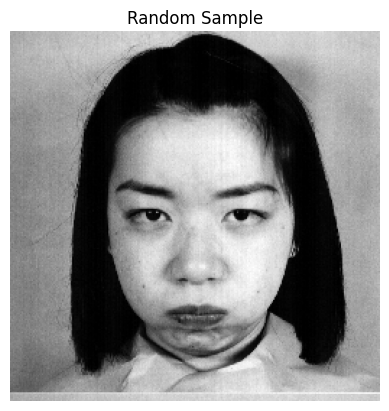

In [4]:
train_directory = os.path.join(local_directory, 'emotion_detection_dateset/train')
test_directory = os.path.join(local_directory, 'emotion_detection_dateset/test')

train_data , train_label = loadImages(train_directory)
test_data , test_label = loadImages(test_directory)

print("number of train data images is" , train_data.shape[0] , "and number of features for each image is", train_data.shape[1])

    ### To show each images, you should reshape it to 256,256 and then use 'plt.imshow'
plt.imshow(train_data[0].reshape(256,256) , cmap='gray')
plt.title('Random Sample')
plt.axis('off')
plt.show()

## Best n_components

In [5]:
pca=PCA()
pca.fit(train_data.reshape(train_data.shape[0], -1))
eigen_values = pca.explained_variance_

kneedle = KneeLocator(np.arange(pca.n_components_), eigen_values, curve='convex', direction='decreasing')
elbow_point = kneedle.elbow

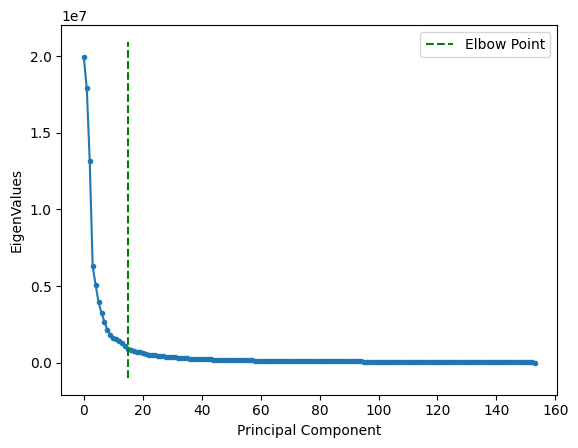

In [6]:
plt.plot(eigen_values,marker='.')
plt.xlabel('Principal Component')
plt.ylabel('EigenValues')
plt.vlines(elbow_point, plt.ylim()[0], plt.ylim()[1], linestyles='dashed',label='Elbow Point',colors='g')
plt.legend()
plt.show()

## First 4 Eigenfaces

EigenValue 1= 19942410
EigenValue 2= 17914137
EigenValue 3= 13182893
EigenValue 4= 6288198


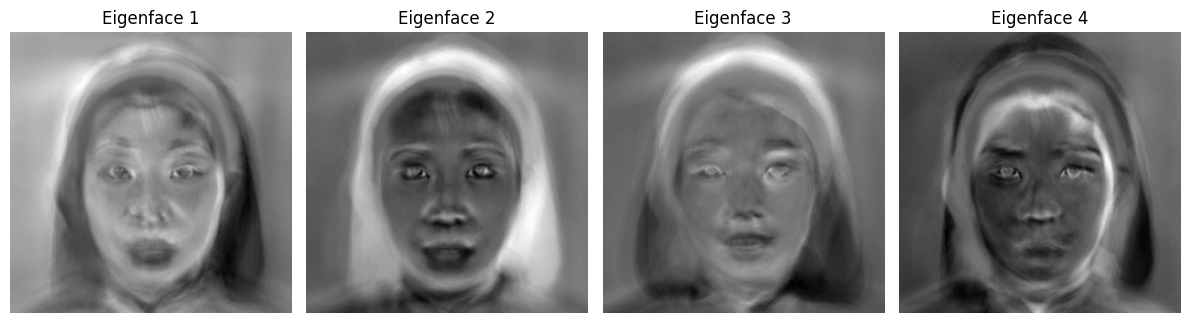

In [7]:
eigenfaces = pca.components_

# Visualize the first 4 eigenfaces
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(eigenfaces[i].reshape(256, 256), cmap='gray')
    ax.set_title('Eigenface {}'.format(i+1))
    ax.axis('off')
    print('EigenValue {}='.format(i+1),round(eigen_values[i]))

plt.tight_layout()
plt.show()

## Last 4 Eigenfaces

EigenValue 153= 0
EigenValue 152= 21384
EigenValue 151= 25822
EigenValue 150= 26264


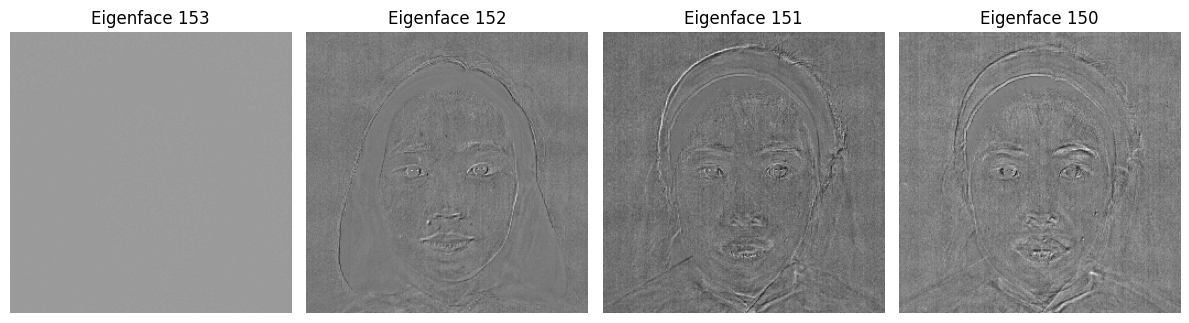

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
	ax.imshow(eigenfaces[-(i+1)].reshape(256, 256), cmap='gray')
	ax.set_title('Eigenface {}'.format(len(eigenfaces)-(i+1)))
	ax.axis('off')
	print('EigenValue {}='.format(len(eigenfaces)-(i+1)),round(eigen_values[len(eigenfaces)-(i+1)]))
plt.tight_layout()
plt.show()